![Houses](https://cdn12.picryl.com/photo/2016/12/31/painted-ladies-houses-san-francisco-architecture-buildings-2efc18-1024.jpg)
# House Median Price Prediction
### Using Deep Neural Networks

### Program Description
This program predicts if the price of a house will be above the median price or not based off of it's features.

### About Neural Networks
Artificial neural networks (ANN) or connectionist systems are computing systems that are inspired by, but not necessarily identical to, the biological neural networks that constitute animal brains. Such systems "learn" to perform tasks by considering examples, generally without being programmed with any task-specific rules. Deep Neural networs are just ANN's with multiple hidden layers.

In [1]:
# Q.import the dependencies
## Start code here
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
## End code here

In [2]:
# Q. Load the data set
## Start code here

data = pd.read_csv('housepricedata.csv')

## End code here

In [3]:
# Q. Look at the data first 7 rows of data

## Start code here

data.head(7)

## End code here

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1


In [4]:
# Q. Convert the data into an array

## Start code here

array_data = np.array(data)
print(array_data.shape)
array_data
## End code here

(1460, 11)


array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [5]:
# Q. Split the data set into X & Y where X = (:,0:10) & Y = (:,10)
## Start code here
x = array_data[:,0:10]
y = array_data[:,10]
print(x.shape)
print(y.shape)
## End code here

(1460, 10)
(1460,)


In [6]:
# Q. Use the min-max scaler method  to scales the dataset so that all the input features lie between 0 and 1 inclusive

## Start code here
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x)
print(x)
## End code here

[[0.0334198  0.66666667 0.5        ... 0.5        0.         0.3864598 ]
 [0.03879502 0.55555556 0.875      ... 0.33333333 0.33333333 0.32440056]
 [0.04650728 0.66666667 0.5        ... 0.33333333 0.33333333 0.42877292]
 ...
 [0.03618687 0.66666667 1.         ... 0.58333333 0.66666667 0.17771509]
 [0.03934189 0.44444444 0.625      ... 0.25       0.         0.16925247]
 [0.04037019 0.44444444 0.625      ... 0.33333333 0.         0.19464034]]


In [23]:
# Q. Split the data into 80% training and 20% (testing (10%) and validation (10%)) and print it

## Start code here
# splitting the data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 123)

# splitting the testing data into test and validation(test data is agian dividing into test and validation)
x_test10, x_vali10, y_test10, y_vali10 = train_test_split(x_test, y_test, test_size=0.5, random_state = 123)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print("20% is split into test and validation split")
print(x_test10.shape)
print(x_vali10.shape)
print(y_test10.shape)
print(y_vali10.shape)

## End code here

(1168, 10)
(292, 10)
(1168,)
(292,)
20% is split into test and validation split
(146, 10)
(146, 10)
(146,)
(146,)


In [8]:
#Build the model and architecture of the deep neural network

# Start code here
from keras.models import Sequential
from keras.layers import Dense
# from tensorflow.keras.optimizers import SGD

# The models architechture 4 layers, 3 with 32 neurons and activation function = relu function, 
# the last layer has 1 neuron with an activation function = sigmoid function which returns a value btwn 0 and 1
# The input shape/ input_dim = 10 the number of features in the data set
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
# End code 

In [9]:
# Q. loss measuers how well the model did on training , and then tries to improve on it using the optimizer
# sgd = SGD
## Start code here
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
## End code here

In [10]:
# Q. Train the model

## Start code here
train_model = model.fit(x_train, y_train, epochs=200, validation_data=(x_vali10, y_vali10))

## End code here

Epoch 1/200
37/37 [==============================] - 0s 7ms/step - loss: 0.7004 - accuracy: 0.5068 - val_loss: 0.6945 - val_accuracy: 0.5137
Epoch 2/200
37/37 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5068 - val_loss: 0.6900 - val_accuracy: 0.5137
Epoch 3/200
37/37 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5077 - val_loss: 0.6864 - val_accuracy: 0.5137
Epoch 4/200
37/37 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5197 - val_loss: 0.6832 - val_accuracy: 0.5411
Epoch 5/200
37/37 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5976 - val_loss: 0.6801 - val_accuracy: 0.7466
Epoch 6/200
37/37 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.7320 - val_loss: 0.6769 - val_accuracy: 0.8219
Epoch 7/200
37/37 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.7808 - val_loss: 0.6736 - val_accuracy: 0.8219
Epoch 8/200
3

Epoch 59/200
37/37 [==============================] - 0s 2ms/step - loss: 0.2894 - accuracy: 0.8878 - val_loss: 0.2681 - val_accuracy: 0.8836
Epoch 60/200
37/37 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.8827 - val_loss: 0.2757 - val_accuracy: 0.8836
Epoch 61/200
37/37 [==============================] - 0s 3ms/step - loss: 0.2867 - accuracy: 0.8810 - val_loss: 0.2650 - val_accuracy: 0.8904
Epoch 62/200
37/37 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.8887 - val_loss: 0.2636 - val_accuracy: 0.8904
Epoch 63/200
37/37 [==============================] - 0s 2ms/step - loss: 0.2820 - accuracy: 0.8861 - val_loss: 0.2649 - val_accuracy: 0.8904
Epoch 64/200
37/37 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.8870 - val_loss: 0.2608 - val_accuracy: 0.8973
Epoch 65/200
37/37 [==============================] - 0s 2ms/step - loss: 0.2805 - accuracy: 0.8853 - val_loss: 0.2591 - val_accuracy: 0.8904
Epoch 

37/37 [==============================] - 0s 2ms/step - loss: 0.2418 - accuracy: 0.8930 - val_loss: 0.2326 - val_accuracy: 0.9041
Epoch 174/200
37/37 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.8964 - val_loss: 0.2624 - val_accuracy: 0.8767
Epoch 175/200
37/37 [==============================] - 0s 2ms/step - loss: 0.2426 - accuracy: 0.8998 - val_loss: 0.2309 - val_accuracy: 0.8973
Epoch 176/200
37/37 [==============================] - 0s 2ms/step - loss: 0.2364 - accuracy: 0.8998 - val_loss: 0.2311 - val_accuracy: 0.8973
Epoch 177/200
37/37 [==============================] - 0s 2ms/step - loss: 0.2369 - accuracy: 0.8998 - val_loss: 0.2322 - val_accuracy: 0.9041
Epoch 178/200
37/37 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.8981 - val_loss: 0.2333 - val_accuracy: 0.9110
Epoch 179/200
37/37 [==============================] - 0s 2ms/step - loss: 0.2403 - accuracy: 0.8981 - val_loss: 0.2328 - val_accuracy: 0.9041
Epoch 180/200

In [25]:
# Q. Evalutae the model
## Start code here
model.evaluate(x_train, y_train)
## End code here


37/37 [==============================] - 0s 1ms/step - loss: 0.2325 - accuracy: 0.8998


[0.23252567648887634, 0.8998287916183472]

In [27]:
# Q. Make a prediction
## Start code here
y_pred10 = model.predict(x_test10)
## End code here

In [14]:
# Q. Make a prediction
## Start code here
y_vali10 = model.predict(x_vali10)
## End code here

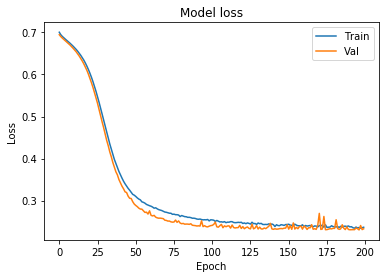

In [29]:
# Q. visualize the training loss and the validation loss to see if the model is overfitting

## Start code here
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
## End code here

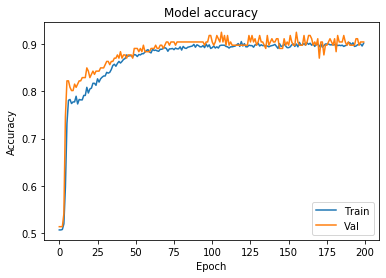

In [21]:
# Q. visualize the training accuracy and the validation accuracy to see if the model is overfitting

## Start code here

plt.plot(train_model.history["accuracy"])
plt.plot(train_model.history["val_accuracy"])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## End code here

Conclusion :
    Models at 90% accuracy has a very light flucations with train and validation data